In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip list


Package                           Version
--------------------------------- ------------------
aext-assistant                    4.1.0
aext-assistant-server             4.1.0
aext-core                         4.1.0
aext-core-server                  4.1.0
aext-panels                       4.1.0
aext-panels-server                4.1.0
aext-project-filebrowser-server   4.1.0
aext-share-notebook               4.1.0
aext-share-notebook-server        4.1.0
aext-shared                       4.1.0
aext-toolbox                      4.1.0
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.13.3
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-cli-base                 0.4.1
anaconda-client      

In [4]:
import pandas as pd

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Inspect datasets
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [7]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


In [9]:
print(customers.describe())
print(products.describe())
print(transactions.describe())


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


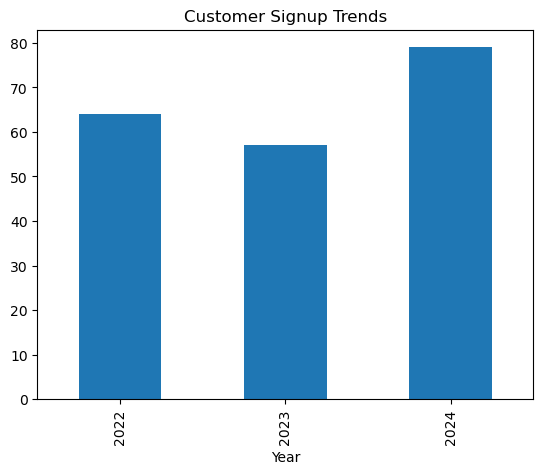

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['Year'] = customers['SignupDate'].dt.year
signup_trends = customers.groupby('Year').size()
signup_trends.plot(kind='bar', title='Customer Signup Trends')
plt.show()


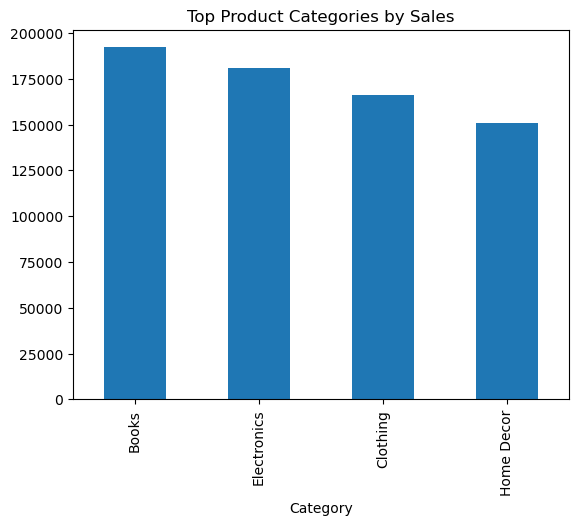

In [13]:
top_categories = transactions.merge(products, on='ProductID')
category_sales = top_categories.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Top Product Categories by Sales')
plt.show()


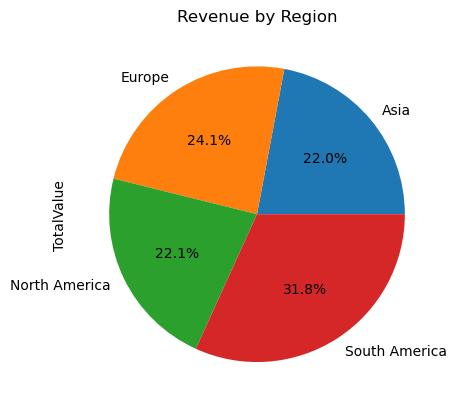

In [15]:
region_revenue = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
region_revenue.plot(kind='pie', title='Revenue by Region', autopct='%1.1f%%')
plt.show()


In [22]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [28]:
customer_profiles = data.groupby('CustomerID').agg({
    'Category': 'count',  # Number of purchases per category
    'TotalValue': 'sum',  # Total spend
    'Region': 'first'     # Region info
})
print(customer_profiles.head())

            Category  TotalValue         Region
CustomerID                                     
C0001              5     3354.52  South America
C0002              4     1862.74           Asia
C0003              4     2725.38  South America
C0004              8     5354.88  South America
C0005              3     2034.24           Asia


In [30]:
numeric_profiles = customer_profiles.select_dtypes(include=['int64', 'float64'])
print(numeric_profiles.head())

            Category  TotalValue
CustomerID                      
C0001              5     3354.52
C0002              4     1862.74
C0003              4     2725.38
C0004              8     5354.88
C0005              3     2034.24


In [32]:
normalized_profiles = (numeric_profiles - numeric_profiles.min()) / (numeric_profiles.max() - numeric_profiles.min())


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity matrix
similarity_matrix = cosine_similarity(normalized_profiles)
print(similarity_matrix)


[[1.         0.98922582 0.99934557 ... 0.99983216 0.99287445 0.98437121]
 [0.98922582 1.         0.98328288 ... 0.98637765 0.99962254 0.9479839 ]
 [0.99934557 0.98328288 1.         ... 0.99984054 0.9879142  0.99009717]
 ...
 [0.99983216 0.98637765 0.99984054 ... 1.         0.9905246  0.98743241]
 [0.99287445 0.99962254 0.9879142  ... 0.9905246  1.         0.95637134]
 [0.98437121 0.9479839  0.99009717 ... 0.98743241 0.95637134 1.        ]]


In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Example customer profiles (replace this with your actual normalized data)
customer_profiles = pd.DataFrame({
    'CustomerID': ['C0001', 'C0002', 'C0003', 'C0004', 'C0005'],
    'Feature1': [0.1, 0.2, 0.3, 0.4, 0.5],
    'Feature2': [0.5, 0.4, 0.3, 0.2, 0.1]
})
customer_ids = customer_profiles['CustomerID'].tolist()
profiles_data = customer_profiles.drop('CustomerID', axis=1)

# Compute similarity matrix
similarity_matrix = cosine_similarity(profiles_data)

# Create the lookalike map
lookalike_map = {}
for i, cust_id in enumerate(customer_ids):
    scores = list(enumerate(similarity_matrix[i]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:4]  # Exclude self and get top 3
    lookalike_map[cust_id] = [(customer_ids[j], score) for j, score in scores]

# Print the map
print(lookalike_map)

# Convert to the required format
lookalike_df = pd.DataFrame([
    {'cust_id': cust_id, 'similar_customers': str(similar_customers)}
    for cust_id, similar_customers in lookalike_map.items()
])

# Save to CSV
lookalike_df.to_csv('Lookalike.csv', index=False)


{'C0001': [('C0002', 0.9647638212377321), ('C0003', 0.8320502943378436), ('C0004', 0.6139406135149205)], 'C0002': [('C0001', 0.9647638212377321), ('C0003', 0.9486832980505137), ('C0004', 0.7999999999999999)], 'C0003': [('C0002', 0.9486832980505137), ('C0004', 0.9486832980505137), ('C0001', 0.8320502943378436)], 'C0004': [('C0005', 0.9647638212377321), ('C0003', 0.9486832980505137), ('C0002', 0.7999999999999999)], 'C0005': [('C0004', 0.9647638212377321), ('C0003', 0.8320502943378435), ('C0002', 0.6139406135149205)]}


In [ ]:
clustering_data = customer_profiles[['Category', 'TotalValue']]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_data)
customer_profiles['Cluster'] = clusters


In [ ]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(normalized_data, clusters)
print("DB Index:", db_index)


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Clusters')
plt.show()
